In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import spacy
import re
sns.set()
py.init_notebook_mode(connected = True)
nlp = spacy.load('en')

# Dear Genie, i want to create a new project for kickstarter, can you suggest me what a good project for my future?

![alt text](https://vignette.wikia.nocookie.net/2007scape/images/8/8c/Genie.png/revision/latest?cb=20151018052559)

# As you wish, my Dear. But before that my dear mere mortal human, we need to study the data first.

I took Runescape Genie picture because I played this game when I was a kid

# Dear human, I will show you how stack multi-model to give you a prediction.

# My base models are bayes and SVM. Upper model is Extreme Gradient Boosting

Dear human, I will create a function to process tags for your data-set.

In [39]:
def clearstring(string):
    string = re.sub('[^a-z ]+', '', string)
    string = string.split(' ')
    string = filter(None, string)
    string = ' '.join([y.strip() for y in string])
    tags = ','.join([str(i) for i in nlp(string) if i.pos_ in ['NOUN']])
    return tags

In [40]:
# df = pd.read_csv('../input/ks-projects-201801.csv',encoding = "ISO-8859-1", keep_default_na=False)
# df['year'] = pd.DatetimeIndex(df['launched']).year
# tags = []
# for i in range(df.shape[0]):
#     try:
#         tags.append(clearstring(df.iloc[i,1].lower()))
#     except:
#         print(df.iloc[i,1])
# df['tags'] = tags
# df.head()

# Skip this process to reduce time completion. I already uploaded processed CSV in this kernel

In [41]:
df = pd.read_csv('../input/dear-genie-kickstarter/dear_jin.csv',encoding = "ISO-8859-1", keep_default_na=False)
df.head()

,Unnamed: 0,"Ã¯Â»Â¿""ID""",name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year,tags
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0,2015,"songs,adelaide,abullah"
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 03:43:57,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100,2017,"greeting,earth,arts,capsule"
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220,2013,
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1,2012,"rekordz,help,album"
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283,2015,"community,film,project,art,neighborhood"


In [42]:
year_unique, year_count = np.unique(df['year'], return_counts = True)
data = [go.Bar(
            x=year_unique[1:],
            y=year_count[1:],
    text=year_count[1:],
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Year count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### See that human, 2015 was the most count you and your human submitted projects in KickStarter, but did you know how many only successful?

In [43]:
state = df.state.unique().tolist()
del state[state.index('live')]
data_bar = []
for i in state:
    year_unique, year_count = np.unique(df[df.state==i]['year'], return_counts = True)
    data_bar.append(go.Bar(x=year_unique[1:],y=year_count[1:],name=i))
layout = go.Layout(
    title = 'State per Year count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

### Only 20.971k successful on 2015, the rest you can hover by yourself mere human

### Now let we check your human post on what categories

In [44]:
main_category_unique, main_category_count = np.unique(df.main_category,return_counts = True)
data = [go.Bar(
            x=main_category_unique,
            y=main_category_count,
    text=main_category_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 204, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Category count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Herm, Film and Video. I spent my entire life watching your human film in my cup, suddenly you found me

### But did you know how many it was successful based on category?

In [45]:
data_bar = []
for i in state:
    main_category_unique, main_category_count = np.unique(df[df.state==i]['main_category'], return_counts = True)
    data_bar.append(go.Bar(x=main_category_unique,y=main_category_count,name=i))
layout = go.Layout(
    title = 'State per Main Category count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

### Music successful more than failed, good job music, I hope Jazz contributed it

### Let we check inside categories of film and video

In [46]:
film_category_unique, film_category_count = np.unique(df[df.main_category == 'Film & Video'].category, return_counts=True)
data = [go.Bar(
            x=film_category_unique,
            y=film_category_count,
    text=film_category_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(255, 224, 179)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Category inside Film & Video',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Who spent their time watching a documentary? tell me!

In [47]:
data_bar = []
for i in state:
    main_category_unique, main_category_count = np.unique(df[(df.state==i) & (df.main_category == 'Film & Video')].category, return_counts = True)
    data_bar.append(go.Bar(x=main_category_unique,y=main_category_count,name=i))
layout = go.Layout(
    title = 'State per Category inside Film & Video count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

### See, documentary tends to failed almost double than successful. Let we check inside Music.

In [48]:
film_category_unique, film_category_count = np.unique(df[df.main_category == 'Music'].category, return_counts=True)
data = [go.Bar(
            x=film_category_unique,
            y=film_category_count,
    text=film_category_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(255, 224, 179)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Category inside Music',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Nooooo, Jazz is not the main contributor for Music.

In [49]:
data_bar = []
for i in state:
    main_category_unique, main_category_count = np.unique(df[(df.state==i) & (df.main_category == 'Music')].category, return_counts = True)
    data_bar.append(go.Bar(x=main_category_unique,y=main_category_count,name=i))
layout = go.Layout(
    title = 'State per Category inside Music count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

# I am very glad Jazz successful more than failed

### Now we are going to check, which tags most used in Kickstarter

In [50]:
tags_succesful=(','.join(df[df.state=='successful'].tags.values.tolist())).split(',')
tags_succesful_unique, tags_succesful_count = np.unique(tags_succesful,return_counts = True)
ids=(-tags_succesful_count).argsort()[:20]

In [51]:
data = [go.Bar(
            x=tags_succesful_unique[ids],
            y=tags_succesful_count[ids],
    text=tags_succesful_count[ids],
    textposition = 'auto',
            marker=dict(
                color='rgb(217, 217, 217)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Top 20 Unigram keywords for successful projects',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Album, can be related to music. Film, obviously related to film and video.

### Now we check, which Trigram always used in Kickstarter

In [52]:
trigram = []
for i in range(len(tags_succesful)-3):
    trigram.append(', '.join(tags_succesful[i:i+3]))
trigram_succesful_unique, trigram_succesful_count = np.unique(trigram,return_counts = True)
ids=(-trigram_succesful_count).argsort()[:20]
data = [go.Bar(
            x=trigram_succesful_unique[ids],
            y=trigram_succesful_count[ids],
    text=trigram_succesful_count[ids],
    textposition = 'auto',
            marker=dict(
                color='rgb(217, 217, 217)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Top 20 Trigram keywords for successful projects',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Do mere human play a card game while riding a bicycle?

### How about 5-gram?

In [53]:
gram_5 = []
for i in range(len(tags_succesful)-5):
    gram_5.append(', '.join(tags_succesful[i:i+5]))
gram_5_succesful_unique, gram_5_succesful_count = np.unique(gram_5,return_counts = True)
ids=(-gram_5_succesful_count).argsort()[:20]
data = [go.Bar(
            x=gram_5_succesful_unique[ids],
            y=gram_5_succesful_count[ids],
    text=gram_5_succesful_count[ids],
    textposition = 'auto',
            marker=dict(
                color='rgb(217, 217, 217)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'Top 20 5-Gram keywords for successful projects',
     margin = dict(
        t = 50,
         b= 200
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### Any bowlmaker name david? Now we are going to study the probability of pledged to be successful

In [54]:
decision = df.state.values
data_array = df.pledged.values
data_bar = []
for no, k in enumerate(state):
    weights = np.ones_like(data_array[decision == k])/float(len(data_array[decision == k]))
    n, bins, _ = plt.hist(data_array[decision == k], 10,weights=weights)
    loc = np.where(n >= 0.5)[0]
    plt.clf()
    data_bar.append(go.Bar(x=bins[loc],y=n[loc],name=k))
layout = go.Layout(
    title = 'Probability how much pledged to be for states',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

### Actually, higher pledged doesnt mean your project will be successful

In [55]:
decision = df.state.values
data_array = df.backers.values
data_bar = []
for no, k in enumerate(state):
    weights = np.ones_like(data_array[decision == k])/float(len(data_array[decision == k]))
    n, bins, _ = plt.hist(data_array[decision == k], 10,weights=weights)
    loc = np.where(n >= 0.5)[0]
    plt.clf()
    data_bar.append(go.Bar(x=bins[loc],y=n[loc],name=k))
layout = go.Layout(
    title = 'Probability how much backers to be for states',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

### Also same, your got a lot of backers also doesnt confirm your project will be successful

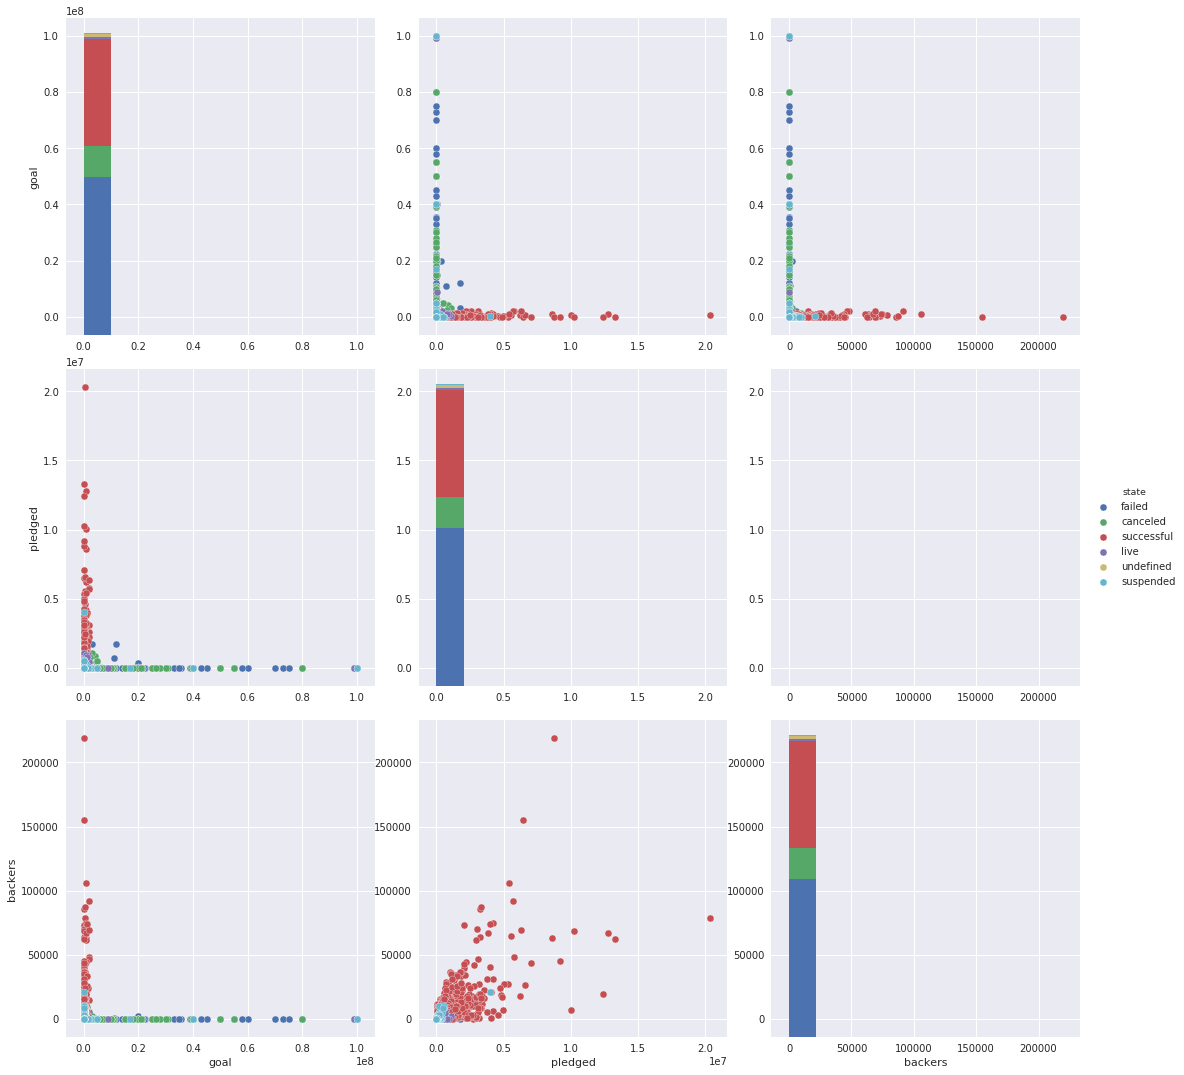

In [56]:
sns.pairplot(df[['goal','pledged','state','backers']], hue="state",size=5)
plt.cla()
plt.show()

### Now we are going to train classifiers to do our prediction, Genie need this!

In [57]:
tags_to_train = df.tags.iloc[np.where((df.tags != '') & (df.state != 'live'))[0]].tolist()
label_to_train = df.state.iloc[np.where((df.tags != '') & (df.state != 'live'))[0]]
# change to binary classification
label_to_train[label_to_train == 'canceled'] = 'failed'
label_to_train[label_to_train == 'undefined'] = 'failed'
label_to_train[label_to_train == 'suspended'] = 'failed'
label_to_train = label_to_train.tolist()
for i in range(len(tags_to_train)):
    tags_to_train[i] = tags_to_train[i].replace(',', ' ')

Change into bag-of-word vectorization for our tags

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(label_to_train)
bow = CountVectorizer().fit(tags_to_train)
X = bow.transform(tags_to_train)

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

In [60]:
clf_huber = SGDClassifier(loss = 'modified_huber', 
                                  penalty = 'l2', alpha = 1e-3, 
                                  n_iter = 50).fit(X, Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning:

n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.



In [61]:
clf_bayes = MultinomialNB().fit(X, Y)

From the output probability of bayes and svm will be stacked column-wise

In [62]:
stacked=np.hstack([clf_bayes.predict_proba(X), clf_huber.predict_proba(X)])

In [63]:
import xgboost as xgb
params_xgd = {
    'max_depth': 7,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'nthread': -1,
    'silent': False,
    'n_estimators': 100
    }
clf = xgb.XGBClassifier(**params_xgd)
clf.fit(stacked,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

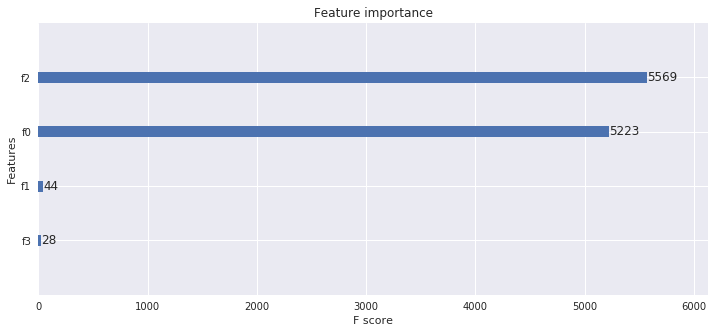

In [64]:
fig, ax = plt.subplots(figsize=(12,5))
xgb.plot_importance(clf, ax=ax)
plt.show()

In [65]:
print(np.mean(clf_bayes.predict(X) == Y))
print(np.mean(clf_huber.predict(X) == Y))
print(np.mean(clf.predict(stacked) == Y))

0.747241969062
0.668989842141
0.756154001672


### The stacked model only helped us a little bit, better than none right?

### Now I will show to you mere human, i do example to suggest 'bicyle' and a 'shit'

In [66]:
from fuzzywuzzy import fuzz
import random
guess = ['bicyle', 'shit']
result_guess = []
tags = df.tags.values.tolist()
for i in guess:
    picked=np.argmax([fuzz.ratio(guess[1], n) for n in tags_succesful_unique])
    results=np.where(np.array([n.find(tags_succesful_unique[picked]) for n in tags]) >=0)[0][:10]
    for k in results:
        count = 0
        while True and count < 10:
            selected = random.choice(tags[k].split(','))
            if selected not in result_guess:
                result_guess.append(selected)
                break
            count+=1

In [67]:
result_guess

['daddy',
 'shit',
 'season',
 'tictacbullshit',
 'shitesocks',
 'podcast',
 'wine',
 'ass',
 'passion',
 'gift',
 'video',
 'planner',
 'bullshit',
 'photos',
 'guitars']

### Now you see, bicycle and a shit give you this nearest tags

In [68]:
from sklearn.neighbors import NearestNeighbors
from random import shuffle
def help_me_genie(wish, suggest_count):
    if wish.find('oh genie, suggest me') < 0:
        return "you need to call me by 'oh genie, suggest me'"
    guess = [i.strip() for i in wish[len('oh genie, suggest me '):].split(',')]
    print('your wish is:',guess)
    result_guess = []
    for i in guess:
        picked=np.argmax([fuzz.ratio(guess[1], n) for n in tags_succesful_unique])
        results=np.where(np.array([n.find(tags_succesful_unique[picked]) for n in tags]) >=0)[0][:10]
        for k in results:
            for n in range(20):
                selected = random.choice(tags[k].split(','))
                if selected not in result_guess:
                    result_guess.append(selected)
                    break
                
    print('your result guess:', result_guess)
    jin_guess=np.zeros((df.shape[0], len(result_guess)))
    for i in range(df.shape[0]):
        for k in range(len(result_guess)):
            if tags[i].find(result_guess[k]) >= 0:
                jin_guess[i, k] += 1
    nbrs = NearestNeighbors(n_neighbors=suggest_count, algorithm='auto', metric='sqeuclidean').fit(jin_guess)
    id_entry = np.argmax(np.sum(jin_guess,axis=1)) 
    xtest = jin_guess[id_entry, :].reshape(1, -1)
    distances, indices = nbrs.kneighbors(xtest)
    results = []
    for i in indices[0][:]:
        items = tags[i].split(',') + [random.choice(result_guess)]
        shuffle(items)
        results.append(' '.join(items))
    prob=clf.predict_proba(np.hstack([clf_huber.predict_proba(bow.transform(results)), clf_bayes.predict_proba(bow.transform(results))]))
    for i in range(len(results)):
        print(results[i], ', successful rate:', prob[i,1]*100, '%')

### Because you find my cup, you can give me any tags and count to suggest for you.

### me: oh okey, I want to study bicycle and invest!

In [69]:
help_me_genie('oh genie, suggest me bicycle, invest', 10)

your wish is: ['bicycle', 'invest']
your result guess: ['investors', 'inventors', 'story', 'zone', 'analysis', 'wrangler', 'chicken', 'project', 'players', 'scene', 'bemyinvestorcom', 'film', 'dads', 'tools', 'shark', 'latkes', 'investor', 'city']
city investor sin investors length players film , successful rate: 86.626458168 %
bemyinvestorcom feature city length documentary players , successful rate: 47.0649898052 %
death fan city fiction batman film bemyinvestorcom , successful rate: 93.3008134365 %
vagabond film city film prison , successful rate: 56.8919599056 %
thesis film goodbye bemyinvestorcom city , successful rate: 53.4094393253 %
film wrangler synthcity , successful rate: 27.8327524662 %
filmi city inventors dreams citi , successful rate: 89.771181345 %
startups game venture valley card latkes investors , successful rate: 90.2397453785 %
documentary film rivercity players xaminer , successful rate: 70.2498555183 %
romance ghost film story zone investors , successful rate: 92

### me: how about taylor swift and a broom?

In [70]:
help_me_genie('oh genie, suggest me taylor swift, broom', 10)

your wish is: ['taylor swift', 'broom']
your result guess: ['personality', 'broom', 'voices', 'children', 'floyd', 'service', 'lebroom', 'brooms', 'broomstick', 'forest', 'broomstache', 'dog', 'mcbroom', 'broomsticks', 'pink', 'future', 'assessment']
novel broomsticks tricks children children , successful rate: 24.9270901084 %
broomstick personality , successful rate: 91.9813513756 %
children spirit mcbroom film ship , successful rate: 30.0347864628 %
email childrens floyd chat network , successful rate: 58.6681902409 %
service children , successful rate: 79.8370778561 %
floyd wombat childrens book wommie picture , successful rate: 19.7121560574 %
rosie service childrens misadventures book petunia , successful rate: 89.1437828541 %
melanie book broomstick childrens , successful rate: 89.7510051727 %
broomstick childrens water book picture , successful rate: 90.8102214336 %
stories floyd rugby rfc children jungle , successful rate: 88.5419249535 %


### me: how about a guitar, a shit and a trousers?

In [71]:
help_me_genie('oh genie, suggest me guitar, shit, trousers', 30)

your wish is: ['guitar', 'shit', 'trousers']
your result guess: ['shit', 'boss', 'season', 'tictacbullshit', 'shitesocks', 'podcast', 'bullshit', 'ass', 'guitars', 'gift', 'video', 'guide', 'wine', 'baller', 'passion', 'music', 'planner', 'tasting', 'photos', 'fun']
bullshit fun guitars tasting passion , successful rate: 79.5611917973 %
podcast passion fund pottery , successful rate: 86.9588136673 %
fund passion diego music ways , successful rate: 86.6038143635 %
glass farm spring expansion bottom brewery tictacbullshit fundraiser , successful rate: 96.1951196194 %
fashion jackets tasting compassion , successful rate: 28.8343757391 %
rebel passion documentaryseries ass , successful rate: 83.3245873451 %
dussel sunglasses fund music songs friends road , successful rate: 86.1226856709 %
passion shitesocks cooking , successful rate: 81.7164003849 %
matthew passion bullshit , successful rate: 46.3261932135 %
career passion guitars , successful rate: 71.49964571 %
peaches wine passion , suc

# Thank you genie, now i feel confidence to create a new project related to guitar and a trousers!

In [72]:
help_me_genie('guitar, shit, trousers', 20)

"you need to call me by 'oh genie, suggest me'"

In [73]:
help_me_genie('oh genie, suggest me guitar, shit, trousers, smart phone, aloe vera', 20)

your wish is: ['guitar', 'shit', 'trousers', 'smart phone', 'aloe vera']
your result guess: ['music', 'shit', 'season', 'tictacbullshit', 'shitesocks', 'podcast', 'tasting', 'photos', 'passion', 'gift', 'video', 'guide', 'wine', 'baller', 'bullshit', 'daddy', 'boss', 'ass', 'fun', 'knox', 'planner', 'guitars']
passion guitars fun bullshit fun , successful rate: 75.0683426857 %
passion music ways diego fund , successful rate: 86.6038143635 %
planner fund passion pottery , successful rate: 88.579839468 %
baller love compassion santiago , successful rate: 30.6707382202 %
watkinsdance shit fundraiser associates company , successful rate: 21.7906296253 %
sin nationalism compassion daddy , successful rate: 42.0793145895 %
funds passion completion mass , successful rate: 42.8631544113 %
life lessons tictacbullshit purpose passion power , successful rate: 56.0854315758 %
baller fun heroes everyone ass , successful rate: 74.0686118603 %
passion fun touch , successful rate: 77.0155668259 %
passi